<a href="https://colab.research.google.com/github/sharna33/CSE_4106_Digital-Image-Processing/blob/main/CSE4106_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Date: 04.08.2025**

## **Import Libraries**

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
from google.colab.patches import cv2_imshow

print("All libraries imported successfully!")

All libraries imported successfully!


## **Function to Load Images from URL**

In [6]:
def load_image_from_url(url, grayscale=True):
    try:
        response = requests.get(url)
        response.raise_for_status()

        # Open image using PIL
        img = Image.open(BytesIO(response.content))

        # Convert PIL image to numpy array
        img_array = np.array(img)

        # Convert to grayscale if needed
        if grayscale and len(img_array.shape) == 3:
            # Convert RGB to grayscale using OpenCV weights
            img_gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
            return img_gray

        return img_array

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

print("Image loading function defined successfully!")

Image loading function defined successfully!


## **Load Source and Target Images**

In [11]:
source_url = "https://raw.githubusercontent.com/sharna33/CSE_4106_Digital-Image-Processing/main/orange-cat.jpg"
target_url = "https://raw.githubusercontent.com/sharna33/CSE_4106_Digital-Image-Processing/main/171026-better-coffee-boost-se-329p.jpg"

print("Loading source image (orange cat)...")
source_img = load_image_from_url(source_url, grayscale=True)

print("Loading target image (coffee)...")
target_img = load_image_from_url(target_url, grayscale=True)

if source_img is not None and target_img is not None:
    print(f"Source image shape: {source_img.shape}")
    print(f"Target image shape: {target_img.shape}")
    print("Images loaded successfully!")
else:
    print("Error loading images!")

# smaller_img1 = cv2.resize(source_img, (0, 0), fx=0.5, fy=0.5)  # fx and fy are scaling factors
# smaller_img2 = cv2.resize(target_img, (0, 0), fx=0.5, fy=0.5)

# cv2_imshow(smaller_img1)
# cv2_imshow(smaller_img2)

Loading source image (orange cat)...
Loading target image (coffee)...
Source image shape: (555, 832)
Target image shape: (998, 1500)
Images loaded successfully!


## **Display Original Images**

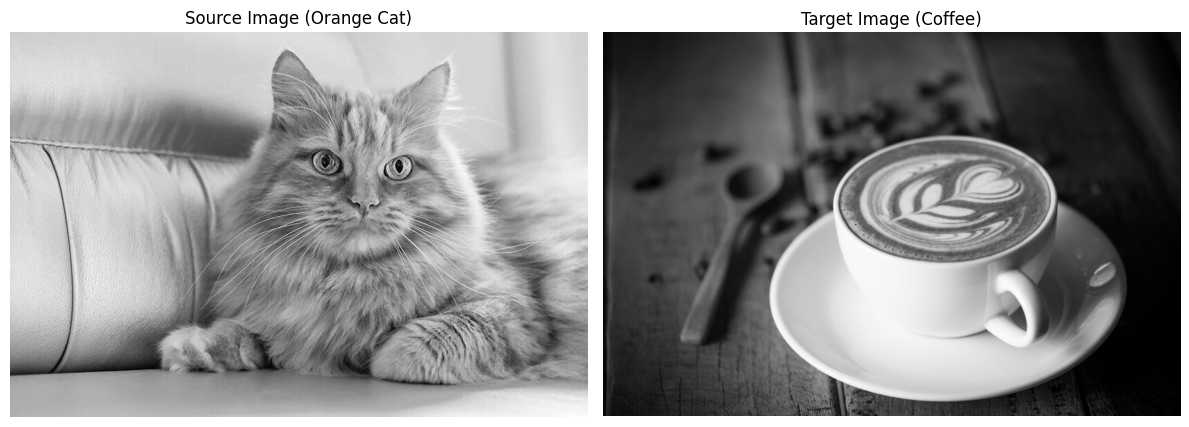

In [12]:
# Block 4: Display Original Images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(source_img, cmap='gray')
plt.title('Source Image (Orange Cat)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(target_img, cmap='gray')
plt.title('Target Image (Coffee)')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Part 1: Histogram Equalization**

## **Calculate Histogram and PDF for Source Image**

In [13]:
def calculate_histogram_pdf(image):
    """
    Calculate histogram and PDF for an image
    """
    # Calculate histogram using OpenCV
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Flatten the histogram array
    hist = hist.flatten()

    # Calculate total number of pixels
    total_pixels = image.shape[0] * image.shape[1]

    # Calculate PDF (Probability Density Function)
    pdf = hist / total_pixels

    return hist, pdf

# Calculate histogram and PDF for source image
source_hist, source_pdf = calculate_histogram_pdf(source_img)

print("Histogram and PDF calculated for source image!")
print(f"Total pixels in source image: {source_img.shape[0] * source_img.shape[1]}")
print(f"Sum of histogram values: {source_hist.sum()}")
print(f"Sum of PDF values: {source_pdf.sum():.6f}")

Histogram and PDF calculated for source image!
Total pixels in source image: 461760
Sum of histogram values: 461760.0
Sum of PDF values: 1.000000


## **Calculate CDF (Cumulative Distribution Function)**

In [14]:
def calculate_cdf(pdf):
    """
    Calculate CDF from PDF
    """
    cdf = np.cumsum(pdf)
    return cdf

# Calculate CDF for source image
source_cdf = calculate_cdf(source_pdf)

# Normalize CDF to range [0, 255] for histogram equalization
source_cdf_normalized = np.round(source_cdf * 255).astype(np.uint8)

print("CDF calculated for source image!")
print(f"CDF min value: {source_cdf.min():.6f}")
print(f"CDF max value: {source_cdf.max():.6f}")
print(f"Normalized CDF min: {source_cdf_normalized.min()}")
print(f"Normalized CDF max: {source_cdf_normalized.max()}")

CDF calculated for source image!
CDF min value: 0.000000
CDF max value: 1.000000
Normalized CDF min: 0
Normalized CDF max: 255


## **Display PDF and CDF Table for Source Image**

In [15]:
def create_pdf_cdf_table(hist, pdf, cdf, cdf_normalized, start_idx=0, end_idx=20):
    """
    Create a table showing intensity levels, histogram, PDF, CDF, and normalized CDF
    """
    intensity_levels = np.arange(256)

    # Select a range for display
    selected_range = slice(start_idx, end_idx)

    table_data = {
        'Intensity Level (r)': intensity_levels[selected_range],
        'Histogram (n_r)': hist[selected_range].astype(int),
        'PDF (p_r)': pdf[selected_range],
        'CDF': cdf[selected_range],
        'Normalized CDF (T(r))': cdf_normalized[selected_range]
    }

    df = pd.DataFrame(table_data)
    return df

# Create and display table for first 20 intensity levels
print("PDF and CDF Table for Source Image (First 20 intensity levels):")
print("="*80)
table_df = create_pdf_cdf_table(source_hist, source_pdf, source_cdf, source_cdf_normalized, 0, 20)
print(table_df.to_string(index=False, float_format='%.6f'))

PDF and CDF Table for Source Image (First 20 intensity levels):
 Intensity Level (r)  Histogram (n_r)  PDF (p_r)      CDF  Normalized CDF (T(r))
                   0                0   0.000000 0.000000                      0
                   1               13   0.000028 0.000028                      0
                   2               19   0.000041 0.000069                      0
                   3               17   0.000037 0.000106                      0
                   4               26   0.000056 0.000162                      0
                   5               24   0.000052 0.000214                      0
                   6               27   0.000058 0.000273                      0
                   7               31   0.000067 0.000340                      0
                   8               48   0.000104 0.000444                      0
                   9               47   0.000102 0.000546                      0
                  10               56   0.000

## **Apply Histogram Equalization**

In [16]:
def histogram_equalization_manual(image, cdf_normalized):
    # Create the equalized image by mapping each pixel value
    equalized_img = cdf_normalized[image]
    return equalized_img

# Apply manual histogram equalization
source_equalized_manual = histogram_equalization_manual(source_img, source_cdf_normalized)

# Also apply OpenCV's built-in histogram equalization for comparison
source_equalized_opencv = cv2.equalizeHist(source_img)

print("Histogram equalization applied!")
print(f"Original image - Min: {source_img.min()}, Max: {source_img.max()}")
print(f"Manual equalized - Min: {source_equalized_manual.min()}, Max: {source_equalized_manual.max()}")
print(f"OpenCV equalized - Min: {source_equalized_opencv.min()}, Max: {source_equalized_opencv.max()}")

Histogram equalization applied!
Original image - Min: 1, Max: 253
Manual equalized - Min: 0, Max: 255
OpenCV equalized - Min: 0, Max: 255


## **Display Histogram Equalization Results**

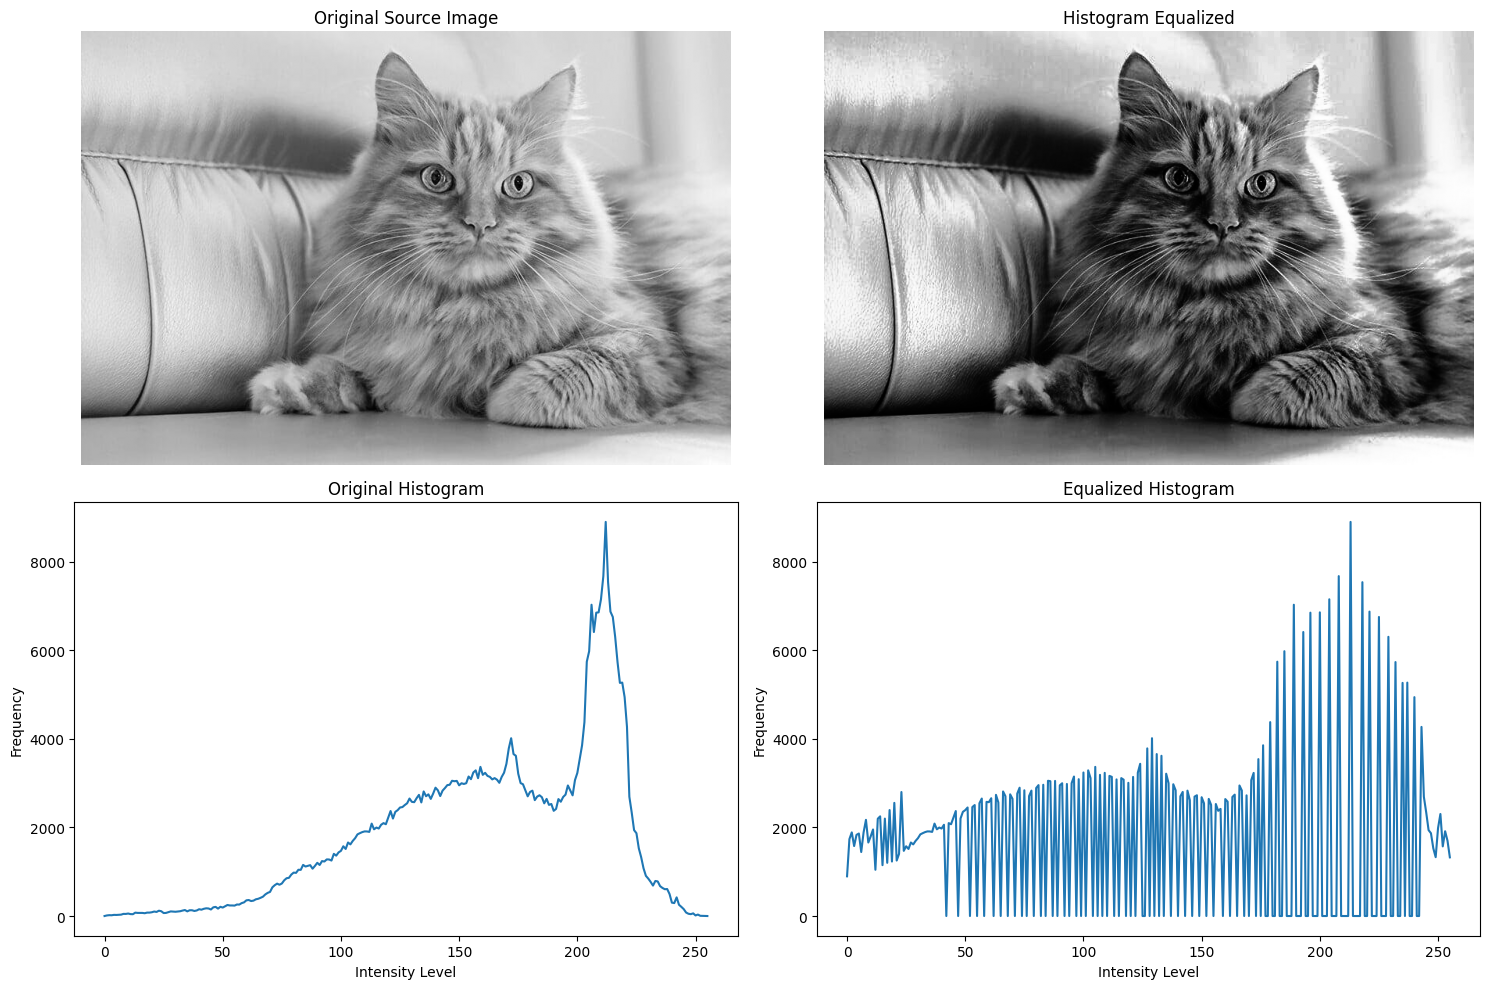

In [19]:
plt.figure(figsize=(15, 10))

# Display images
plt.subplot(2, 2, 1)
plt.imshow(source_img, cmap='gray')
plt.title('Original Source Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(source_equalized_manual, cmap='gray')
plt.title('Histogram Equalized')
plt.axis('off')

# Display histograms
plt.subplot(2, 2, 3)
plt.plot(source_hist)
plt.title('Original Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
manual_eq_hist, _ = calculate_histogram_pdf(source_equalized_manual)
plt.plot(manual_eq_hist)
plt.title('Equalized Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Part 2: Histogram Specification/Matching**

## **Calculate CDF for Target Image**

In [20]:
target_hist, target_pdf = calculate_histogram_pdf(target_img)

# Calculate CDF for target image
target_cdf = calculate_cdf(target_pdf)

# Normalize target CDF to range [0, 255]
target_cdf_normalized = np.round(target_cdf * 255).astype(np.uint8)

print("Target image CDF calculated!")
print(f"Target image shape: {target_img.shape}")
print(f"Target CDF min value: {target_cdf.min():.6f}")
print(f"Target CDF max value: {target_cdf.max():.6f}")
print(f"Target normalized CDF min: {target_cdf_normalized.min()}")
print(f"Target normalized CDF max: {target_cdf_normalized.max()}")

Target image CDF calculated!
Target image shape: (998, 1500)
Target CDF min value: 0.005760
Target CDF max value: 1.000000
Target normalized CDF min: 1
Target normalized CDF max: 255


## **Create Mapping Function for Histogram Specification**

In [21]:
def create_mapping_function(source_cdf_norm, target_cdf_norm):
    """
    Create mapping function to transform source histogram to target histogram
    """
    mapping = np.zeros(256, dtype=np.uint8)

    for i in range(256):
        # Find the closest CDF value in target for each source intensity
        diff = np.abs(target_cdf_norm - source_cdf_norm[i])
        closest_idx = np.argmin(diff)
        mapping[i] = closest_idx

    return mapping

# Create the mapping function
mapping_function = create_mapping_function(source_cdf_normalized, target_cdf_normalized)

print("Mapping function created!")
print(f"Mapping function shape: {mapping_function.shape}")
print(f"Example mappings:")
print(f"Intensity 0 -> {mapping_function[0]}")
print(f"Intensity 50 -> {mapping_function[50]}")
print(f"Intensity 100 -> {mapping_function[100]}")
print(f"Intensity 150 -> {mapping_function[150]}")
print(f"Intensity 200 -> {mapping_function[200]}")
print(f"Intensity 255 -> {mapping_function[255]}")

Mapping function created!
Mapping function shape: (256,)
Example mappings:
Intensity 0 -> 0
Intensity 50 -> 1
Intensity 100 -> 13
Intensity 150 -> 48
Intensity 200 -> 95
Intensity 255 -> 249


## **Display Mapping Table for Histogram Specification**

In [22]:
def create_mapping_table(mapping_func, source_cdf_norm, target_cdf_norm, start_idx=0, end_idx=30):
    intensity_levels = np.arange(256)

    # Select a range for display
    selected_range = slice(start_idx, end_idx)

    table_data = {
        'Source Intensity (r)': intensity_levels[selected_range],
        'Source CDF': source_cdf_norm[selected_range],
        'Mapped Intensity (s)': mapping_func[selected_range],
        'Target CDF at s': target_cdf_norm[mapping_func[selected_range]]
    }

    df = pd.DataFrame(table_data)
    return df

# Create and display mapping table for first 30 intensity levels
print("Pixel Mapping Table for Histogram Specification (First 30 intensity levels):")
print("="*80)
mapping_table_df = create_mapping_table(mapping_function, source_cdf_normalized,
                                       target_cdf_normalized, 0, 30)
print(mapping_table_df.to_string(index=False))

Pixel Mapping Table for Histogram Specification (First 30 intensity levels):
 Source Intensity (r)  Source CDF  Mapped Intensity (s)  Target CDF at s
                    0           0                     0                1
                    1           0                     0                1
                    2           0                     0                1
                    3           0                     0                1
                    4           0                     0                1
                    5           0                     0                1
                    6           0                     0                1
                    7           0                     0                1
                    8           0                     0                1
                    9           0                     0                1
                   10           0                     0                1
                   11           0              

## **Apply Histogram Specification**

In [23]:
def histogram_specification_manual(source_img, mapping_func):
    """
    Apply histogram specification using the mapping function
    """
    # Apply the mapping to each pixel in the source image
    specified_img = mapping_func[source_img]
    return specified_img

# Apply manual histogram specification
source_specified_manual = histogram_specification_manual(source_img, mapping_function)

# Also apply OpenCV's histogram matching for comparison (using exposure.match_histograms if available)
# For now, we'll stick with our manual implementation
print("Histogram specification applied!")
print(f"Original source image - Min: {source_img.min()}, Max: {source_img.max()}")
print(f"Specified image - Min: {source_specified_manual.min()}, Max: {source_specified_manual.max()}")
print(f"Target image - Min: {target_img.min()}, Max: {target_img.max()}")

Histogram specification applied!
Original source image - Min: 1, Max: 253
Specified image - Min: 0, Max: 249
Target image - Min: 0, Max: 255


## **Display Histogram Specification Results**

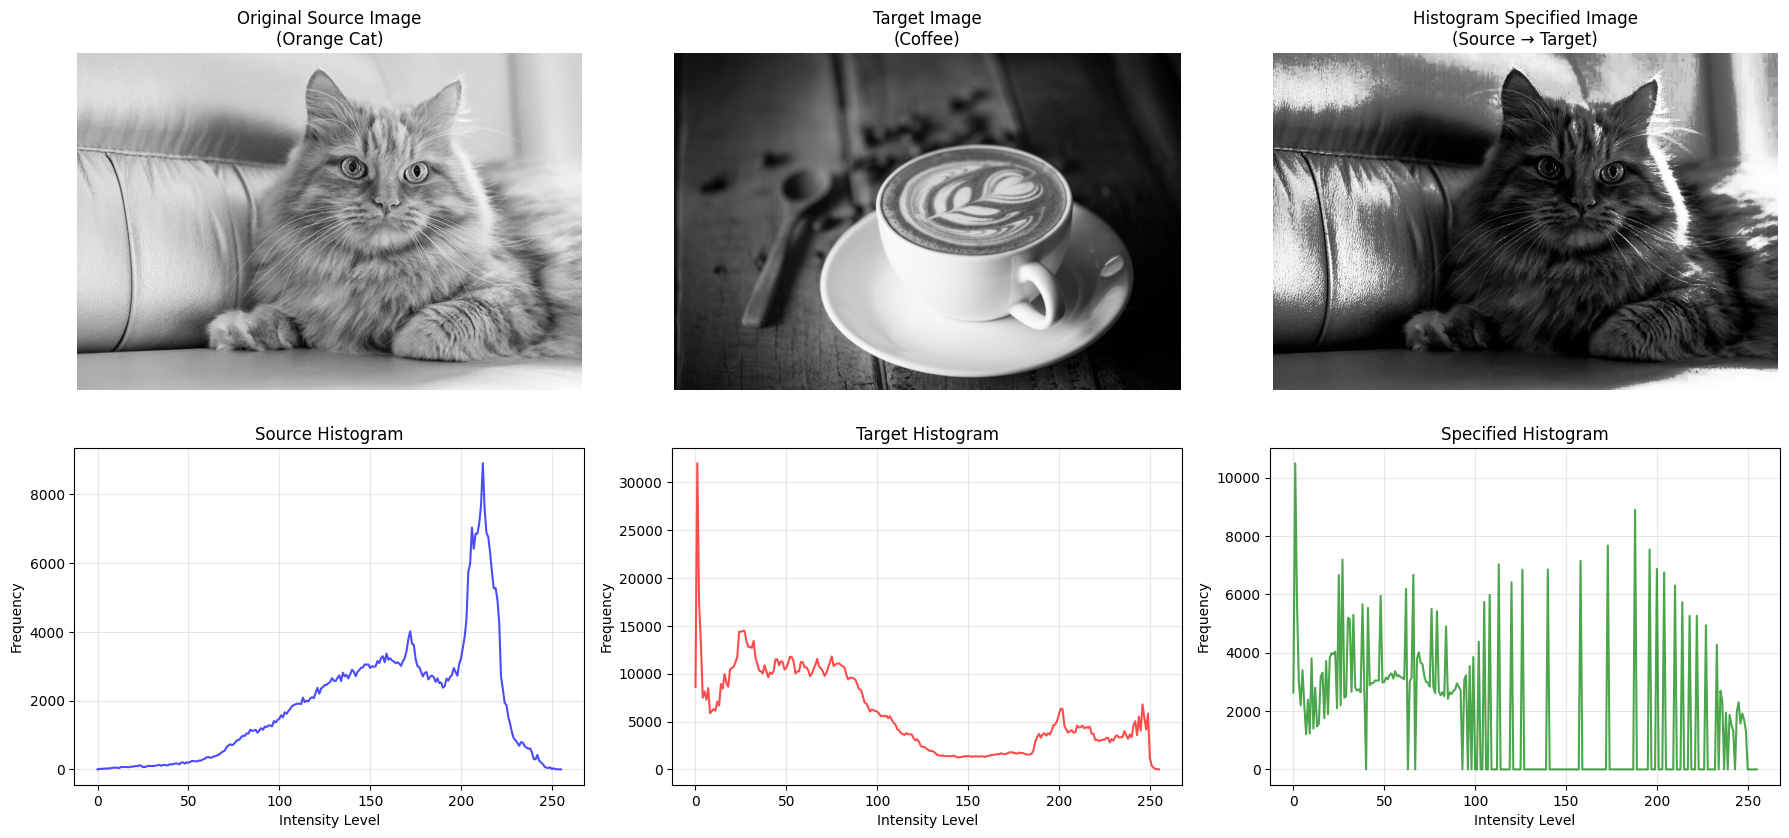

In [27]:
plt.figure(figsize=(18, 12))

# Display images
plt.subplot(3, 3, 1)
plt.imshow(source_img, cmap='gray')
plt.title('Original Source Image\n(Orange Cat)')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(target_img, cmap='gray')
plt.title('Target Image\n(Coffee)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(source_specified_manual, cmap='gray')
plt.title('Histogram Specified Image\n(Source → Target)')
plt.axis('off')

# Display histograms
plt.subplot(3, 3, 4)
plt.plot(source_hist, color='blue', alpha=0.7)
plt.title('Source Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 5)
plt.plot(target_hist, color='red', alpha=0.7)
plt.title('Target Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 6)
specified_hist, _ = calculate_histogram_pdf(source_specified_manual)
plt.plot(specified_hist, color='green', alpha=0.7)
plt.title('Specified Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()